In [29]:
! pip install -q kaggle

In [30]:
!chmod 600 /root/.kaggle/kaggle.json

In [31]:
!kaggle datasets list -s 'Quora Question Pairs'

ref                                                           title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sambit7/first-quora-dataset                                   First Quora Dataset Release: Question Pairs         21854119  2017-02-13 17:56:10.223000           1494         19  0.8235294        
quora/question-pairs-dataset                                  Question Pairs Dataset                              21794834  2017-02-02 01:26:29.210000          14405        259  0.88235295       
elemento/quora-question-pairs                                 Quora Question Pairs                              9347146044  2021-10-06 14:47:15.347000            202          6  0.5882353        
rishisankineni/text-

In [32]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [33]:
!kaggle datasets download -d 'quora/question-pairs-dataset'

Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other
question-pairs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
import zipfile
zip_ref=zipfile.ZipFile('/content/question-pairs-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df=pd.read_csv('/content/questions.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [37]:
df.shape

(404351, 6)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [39]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [40]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
404346,False
404347,False
404348,False
404349,False


In [41]:
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,255045
1,149306


In [42]:
(df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100

,count
is_duplicate,
0,63.07515
1,36.92485


<Axes: xlabel='is_duplicate'>

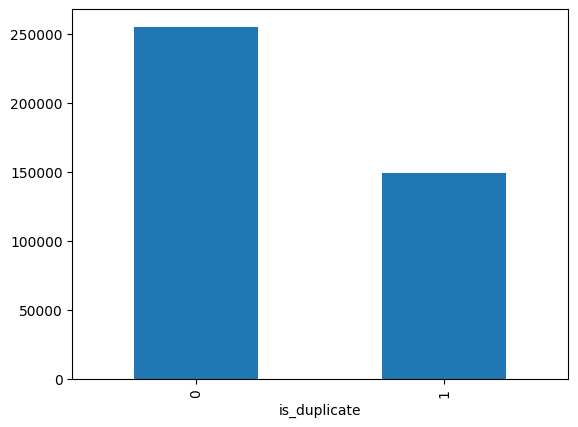

In [43]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [44]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Numbers of unique question',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions that are repeated',x[x].shape[0])

Numbers of unique question 789801
Number of questions that are repeated 13698


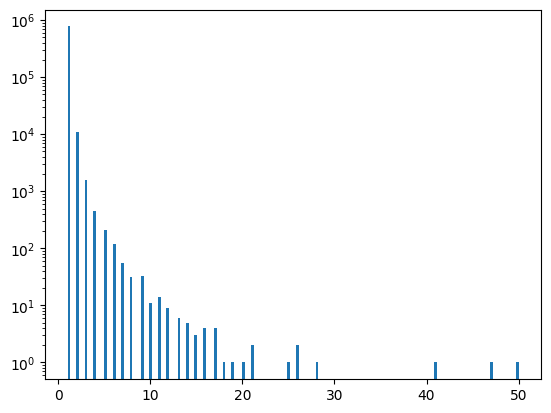

In [45]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [46]:
#BOW
df1=df.sample(30000)
df1.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [47]:
df1.duplicated().sum()

np.int64(0)

In [48]:
ques_df=df1[['question1','question2']]
ques_df.head()

,question1,question2
35324,Que es permanente parcial?,How does a Dark Blue color Indian Passport loo...
260214,How can I start a restaurant in India?,Can a restaurant business be started in India ...
113117,60 amp 3 phase would it be 60 amps per phase o...,What is the cheapest way to send a stethoscope...
280277,"Could I learn a language only for writing, lis...",What is the easiest spoken language to learn?
1646,Is there a difference between a Libertarian an...,What is the difference between a libertarian a...


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [50]:
temp1=pd.DataFrame(q1_arr,index=ques_df.index)
temp2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp1,temp2],axis=1)
temp_df.shape

(30000, 6000)

In [51]:
temp_df['is_duplicate']=df1['is_duplicate']

In [52]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
35324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.736

In [55]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7198333333333333